
Missing Data Percentage:
Patient_ID        0.000000
Age               0.000000
Gender            4.158416
Blood_Pressure    5.940594
Cholesterol       3.960396
Diabetes          0.000000
Heart_Disease     0.000000
dtype: float64


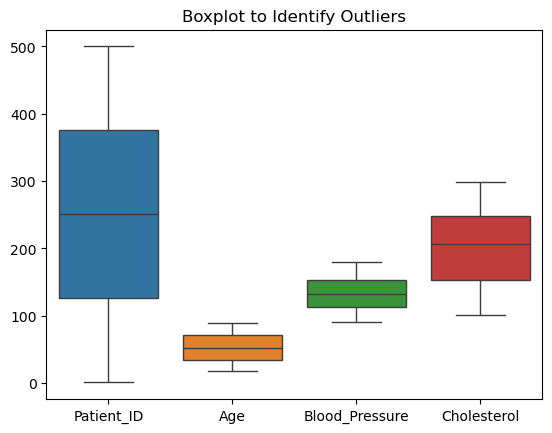


Data After Cleaning:
<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Patient_ID         500 non-null    float64
 1   Age                500 non-null    float64
 2   Blood_Pressure     500 non-null    float64
 3   Cholesterol        500 non-null    float64
 4   Gender_Male        500 non-null    bool   
 5   Diabetes_Yes       500 non-null    bool   
 6   Heart_Disease_Yes  500 non-null    bool   
dtypes: bool(3), float64(4)
memory usage: 21.0 KB
None


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.impute import SimpleImputer

df = pd.read_csv('/Users/kruthikasaisree/Downloads/Day_16_Healthcare_Data.csv')

missing_data = df.isnull().sum()
missing_percentage = (missing_data / len(df)) * 100
print("\nMissing Data Percentage:")
print(missing_percentage)

numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

imputer_num = SimpleImputer(strategy='median')
df[numerical_cols] = imputer_num.fit_transform(df[numerical_cols])

imputer_cat = SimpleImputer(strategy='most_frequent')
df[categorical_cols] = imputer_cat.fit_transform(df[categorical_cols])

duplicates = df[df.duplicated()]
df = df.drop_duplicates()

sns.boxplot(data=df[numerical_cols])
plt.title('Boxplot to Identify Outliers')
plt.show()

for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

df = pd.get_dummies(df, drop_first=True)

scaler = MinMaxScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

print("\nData After Cleaning:")
print(df.info())

df.to_csv('cleaned_healthcare_data.csv', index=False)
